<a href="https://colab.research.google.com/github/Hollykid10/Calories-Burnt/blob/main/Calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install kaggle

In [107]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [82]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [13]:
exercise_data = pd.read_csv("exercise.csv")
calorie_data = pd.read_csv("calories.csv")

In [12]:
exercise_data.head(5)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [22]:
calorie_data.head(5)

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [21]:
calorie_data.drop(columns="User_ID", axis=1, inplace=True)

In [23]:
calorie_data.head(5)

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [24]:
calorie_exercise = pd.concat([exercise_data,calorie_data], axis=1)

In [25]:
calorie_exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
print(calorie_exercise.duplicated().any())

False


In [26]:
calorie_exercise.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [27]:
calorie_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [28]:
calorie_exercise.shape

(15000, 9)

**Data Preprocessing**

In [29]:
calorie_exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Replace Gender With int 0, 1**
Female - 0
Male - 1

In [32]:
calorie_exercise.replace({"Gender":{"female":0, "male":1}}, inplace=True)

In [33]:
calorie_exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [44]:
calorie_exercise.drop(columns="User_ID", axis=1, inplace=True)

In [45]:
correlation = calorie_exercise.corr()


<Axes: >

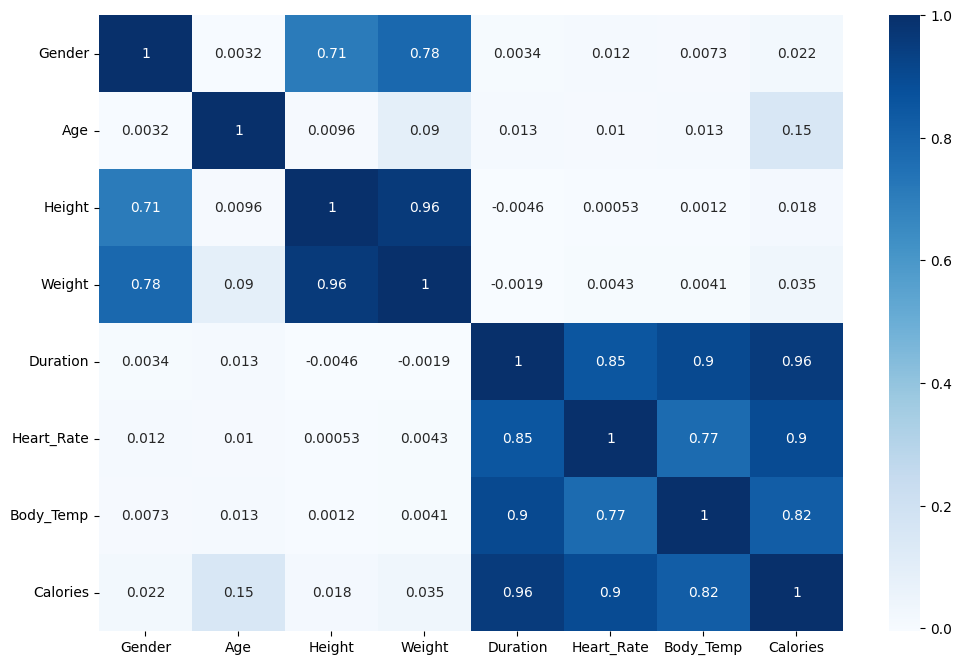

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cbar=True, cmap="Blues")

<ipython-input-50-ae96cf2283c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calorie_exercise[i])
<ipython-input-50-ae96cf2283c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calorie_exercise[i])
<ipython-input-50-ae96cf2283c2>:8: UserWarning: 

`distplot` is a deprecated function and wi

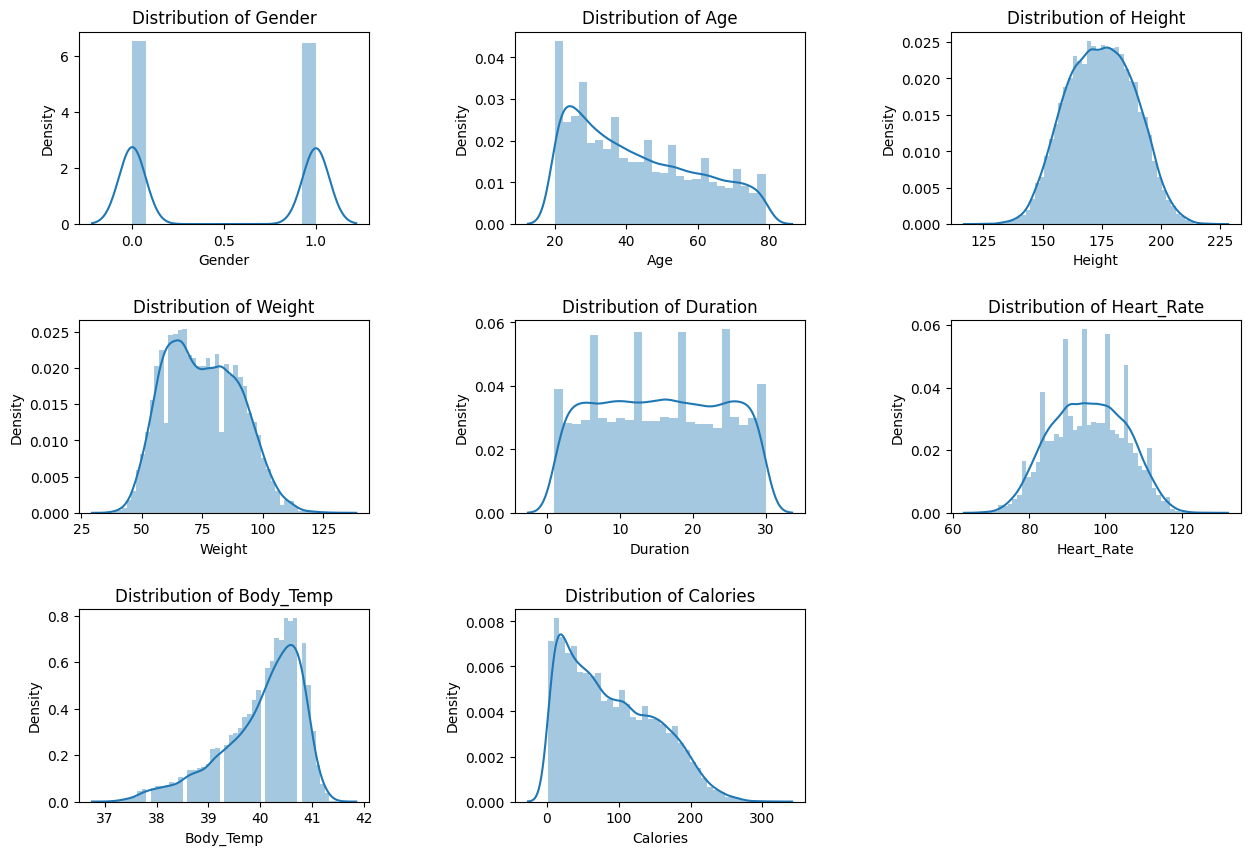

In [50]:
# Distribution of each columns
plt.figure(figsize=(15, 10))
n = 0["Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp",	"Calories"]:
for i in
  n += 1
  plt.subplot(3, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(calorie_exercise[i])
  plt.title(f"Distribution of {i}")
plt.show()

In the plot above, we visualize distribution of all our feature columns in the dataset. Each subplots represent the distribution of each features variable [Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp] and target variable Calorie.
I use displot function from seaborn library to create each plot.

([<matplotlib.patches.Wedge at 0x79dfafe99420>,
 [Text(-0.012209970427148912, 1.0999322327408032, 'Female'),
  Text(0.012209867444060349, -1.0999322338839783, 'Male')],
 [Text(-0.006659983869353951, 0.599963036040438, '50.35'),
  Text(0.006659927696760189, -0.5999630366639881, '49.65')])

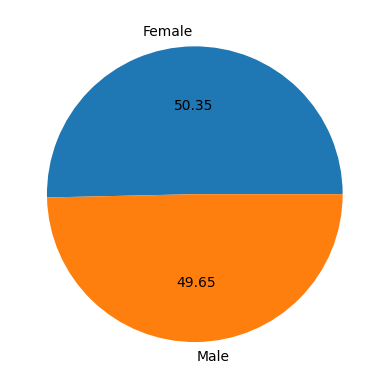

In [55]:
plt.pie(calorie_exercise["Gender"].value_counts(), labels=["Female", "Male"], autopct="%1.2f")

**Effect of our features on Calories**

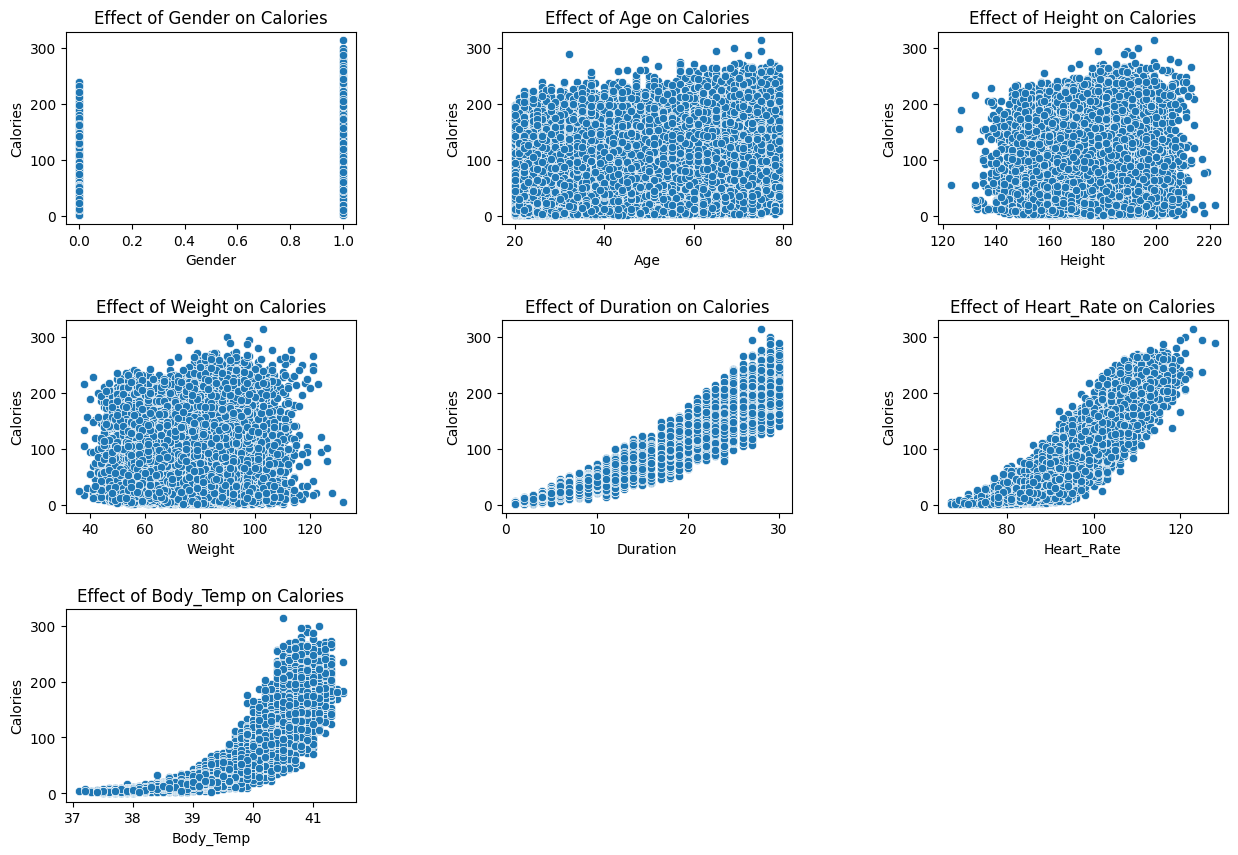

In [59]:
plt.figure(figsize=(15, 10))
n = 0
for i in ["Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp"]:
  n += 1
  plt.subplot(3,3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.scatterplot(data=calorie_exercise, x=i, y="Calories")
  plt.title(f"Effect of {i} on Calories")
plt.show()




In the plot above, we visualize the relationship that exists between various features and calories in the dataset. Each subplots represent the relationship that between a specific feature ["Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp"] and target column [calories]. I used scatterplot function from seaborn library to create each plot, showing how each feature correlates with number of calories.




"Duration",	"Heart_Rate" and "Body_Temp" are highly positively correlated, indicating as they increases so does the number of calories increases too. while Gender",	"Age",	"Height" and "Weight" show a slight sign of correlation between them and calories



**Split data into x features and y target variables**

In [61]:
x = calorie_exercise.drop(columns="Calories", axis=1)
y = calorie_exercise["Calories"]

**Split data into training and testing Data**

In [90]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
# model = XGBRegressor()
model = XGBRegressor()

In [69]:
# parameters = {
#     "learning_rate":[0.5, 0.1, 0.01, 0.001],
#         "max_depth":[3, 5, 10, 20],
#         "n_estimators":[10, 50, 100, 200]
# }
parameter = {
    "learning_rate":[0.5, 0.1, 0.01, 0.001],
    "max_depth":[3,10, 20],
    "n_estimators" : [10, 50, 100, 200]
}

In [72]:
# classifier = RandomizedSearchCV(model, parameters, cv=5)
classifier = RandomizedSearchCV(model, parameter, cv=5)

In [73]:
# classifier.fit(x, y)
classifier.fit(x, y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.5, 0.1, 0.01,
                                                          0.001],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]})

In [74]:
classifier.cv_results_

{'mean_fit_time': array([1.74731946, 0.07689695, 0.21928768, 0.03943992, 1.81161585,
        0.07740197, 0.59897561, 0.22906904, 0.03590932, 0.77323704]),
 'std_fit_time': array([8.38923307e-01, 2.47240981e-02, 1.29816391e-01, 9.43986683e-03,
        8.54361132e-01, 4.22708691e-03, 1.00095770e-02, 1.35321210e-02,
        5.22167967e-04, 4.07239496e-01]),
 'mean_score_time': array([0.03481216, 0.01047583, 0.01586151, 0.00681658, 0.04299045,
        0.00944176, 0.02050877, 0.01572871, 0.00731368, 0.02403994]),
 'std_score_time': array([0.01367719, 0.0033373 , 0.01022168, 0.00020485, 0.0208961 ,
        0.00084521, 0.00139082, 0.00024058, 0.00058669, 0.00893476]),
 'param_n_estimators': masked_array(data=[200, 10, 50, 10, 100, 50, 100, 200, 10, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 5, 5, 20, 5, 10, 5, 5, 10],
       

**Get best parameter, Best score and load the result to pandas dataframe**

In [75]:
# Best parameter
best_parameter  = classifier.best_params_
print(best_parameter)

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.5}


In [77]:
# Best Score
best_score = classifier.best_score_
print(best_score)

0.9988374337022135


In [85]:
result = pd.DataFrame(classifier.cv_results_)
randomize_search_result = result[["param_n_estimators", "param_max_depth", "param_learning_rate"]]
print(randomize_search_result)
print(result.head(5))

  param_n_estimators param_max_depth param_learning_rate
0                200               3                0.01
1                 10               3                0.01
2                 50               5               0.001
3                 10               5                 0.5
4                100              20                 0.5
5                 50               5                 0.5
6                100              10                0.01
7                200               5                 0.5
8                 10               5                 0.1
9                 50              10                0.01
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators  \
0       1.747319      0.838923         0.034812        0.013677                200   
1       0.076897      0.024724         0.010476        0.003337                 10   
2       0.219288      0.129816         0.015862        0.010222                 50   
3       0.039440      0.00944

**Build model using best hyperparameters**

In [88]:
updated_model = XGBRegressor(n_estimators = 200, max_depth=5, learning_rate= 0.5)

In [89]:
updated_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
# Training Predict
training_predict = updated_model.predict(x_train)
training_mae = mean_absolute_error(y_train, training_predict)
print(training_mae)

0.8041849243491888


In [93]:
# Testing_predict
testing_predict = updated_model.predict(x_test)
testing_mae = mean_absolute_error(y_test, testing_predict)
print(testing_mae)

1.4924913250034053


**Predictive System**

In [104]:
input_data = ([1,68,190.0,94.0,29.0,105.0,40.8])

In [105]:
input_data_array = np.array(input_data)
input_data_reshape = input_data_array.reshape(1, -1)
input_predict = updated_model.predict(input_data_reshape)
print(input_predict)

[232.65285]


In this machine learning project, I successfully implemented the XGBoost algorithm for a regression problem. I analyzed, visualized, and identified relationships that exist between the features and target columns.

I also learned model optimization using randomized hyperparameter tuning to select the best parameters and achieve the highest score.

Through this project, I enhanced my skills in data analysis, visualization, and model optimization, using randomized hyperparameter tuning to improve the accuracy of machine learning models.






